In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv(r"C:\Users\amolg\OneDrive\Desktop\Kanak DS\projects\Automobile_data.csv")  # Replace with your actual file name

In [88]:
print("Previewing data")
print(df.head())

Previewing data
   symboling normalized-losses         make fuel-type   body-style  \
0          3                 ?  alfa-romero       gas  convertible   
1          3                 ?  alfa-romero       gas  convertible   
2          1                 ?  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21      

In [90]:
a=df.shape
print("The dimensions are:",a)
print("Number of rows:", a[0])
print("Number of columns:",a[1])

The dimensions are: (205, 15)
Number of rows: 205
Number of columns: 15


In [92]:
print("Datatypes per column")
print(df.dtypes)

Datatypes per column
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [94]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


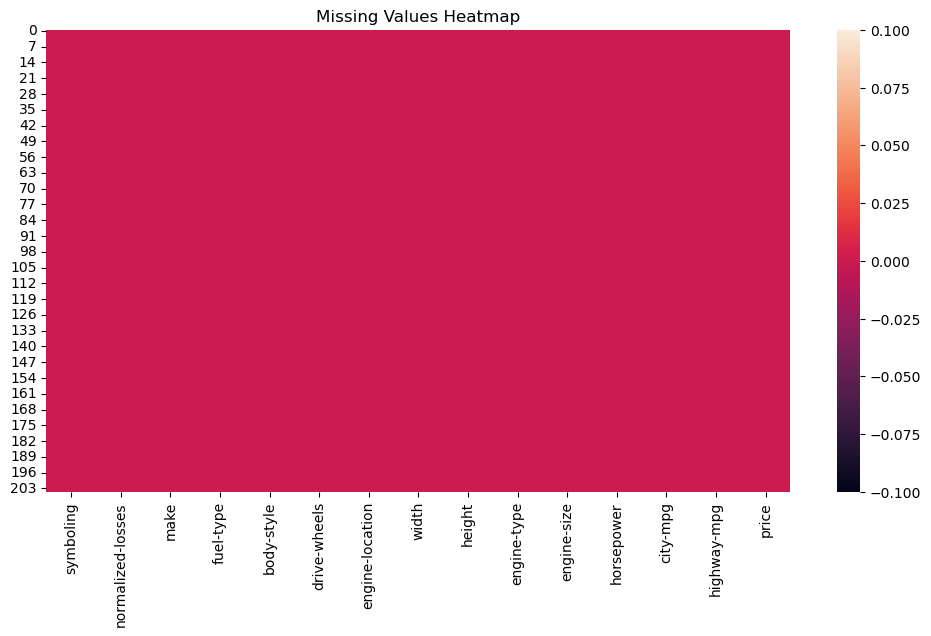

In [96]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.title("Missing Values Heatmap")
plt.show()

In [97]:
print("Last 40 records")
print(df.tail(40))

Last 40 records
     symboling normalized-losses        make fuel-type   body-style  \
165          1               168      toyota       gas        sedan   
166          1               168      toyota       gas    hatchback   
167          2               134      toyota       gas      hardtop   
168          2               134      toyota       gas      hardtop   
169          2               134      toyota       gas    hatchback   
170          2               134      toyota       gas      hardtop   
171          2               134      toyota       gas    hatchback   
172          2               134      toyota       gas  convertible   
173         -1                65      toyota       gas        sedan   
174         -1                65      toyota    diesel        sedan   
175         -1                65      toyota       gas    hatchback   
176         -1                65      toyota       gas        sedan   
177         -1                65      toyota       gas    hat

In [98]:
df.replace(["?", "NA", "n/a", "null", "--", "NaN"], np.nan, inplace=True)
print(df.head())

   symboling normalized-losses         make fuel-type   body-style  \
0          3               NaN  alfa-romero       gas  convertible   
1          3               NaN  alfa-romero       gas  convertible   
2          1               NaN  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  

In [102]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numeric columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Impute categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True) 
print(df.head())

   symboling normalized-losses         make fuel-type   body-style  \
0          3               161  alfa-romero       gas  convertible   
1          3               161  alfa-romero       gas  convertible   
2          1               161  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  

C:\Users\amolg\AppData\Local\Temp\ipykernel_19484\3035989069.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


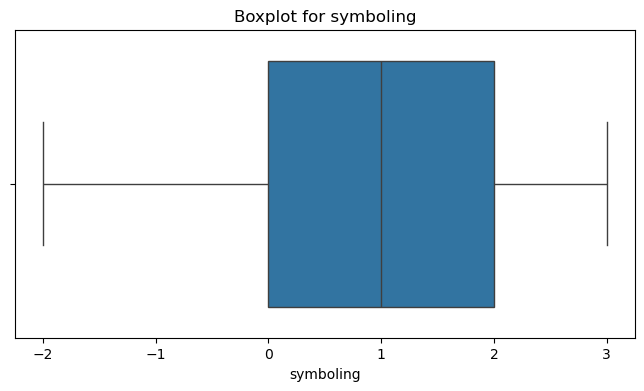

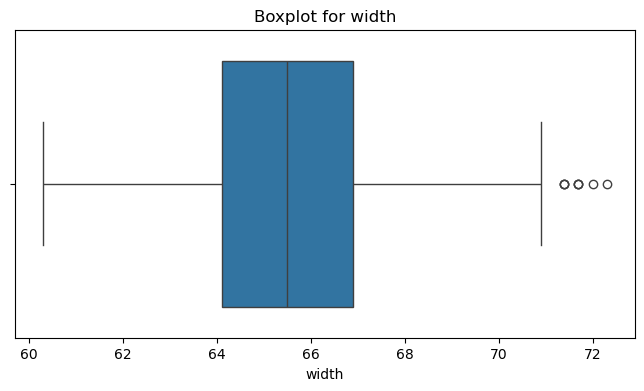

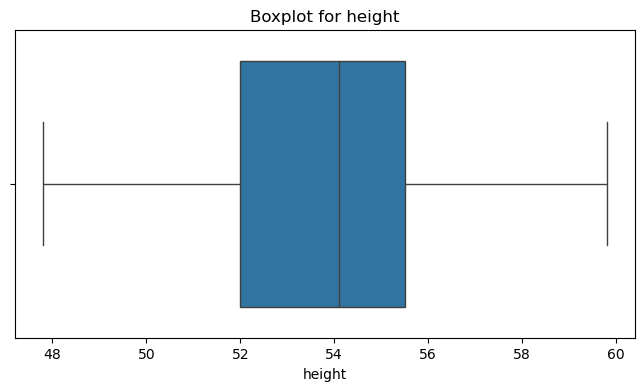

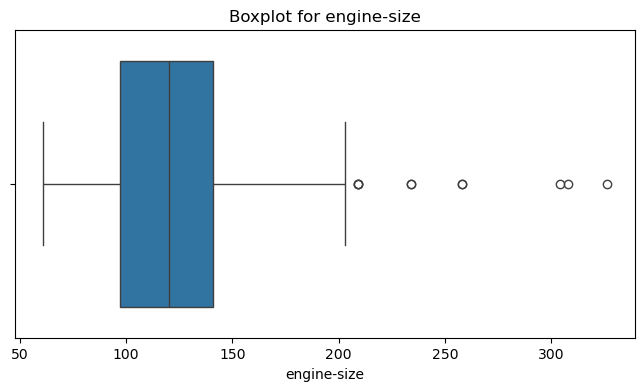

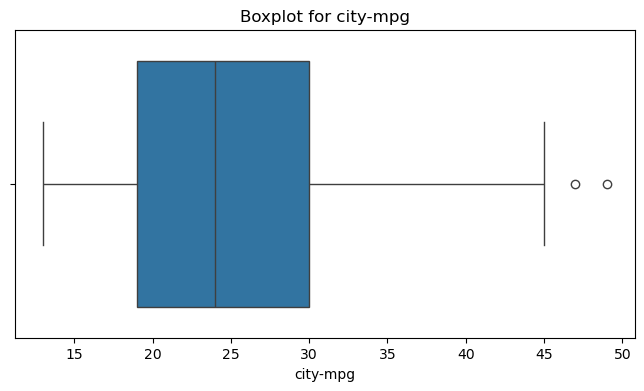

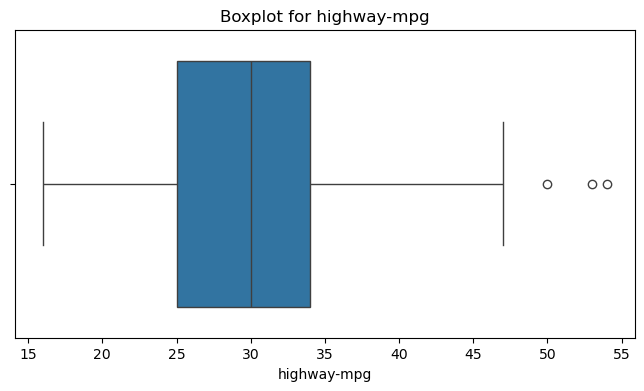

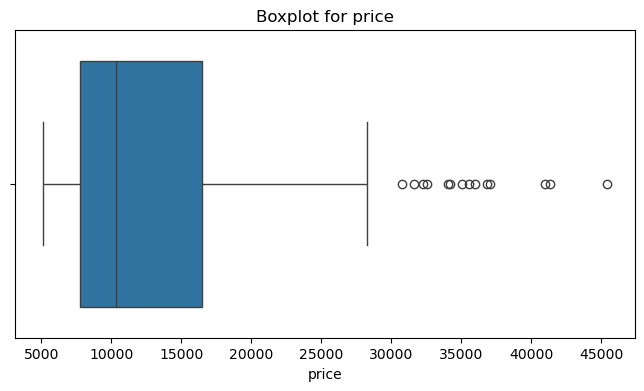

In [104]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [105]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [106]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:")
print(numerical_features)

print("Categorical Features:")
print(categorical_features)


Numerical Features:
['symboling', 'width', 'height', 'engine-size', 'city-mpg', 'highway-mpg', 'price']
Categorical Features:
['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'horsepower']


In [110]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

print("\n Categorical features encoded successfully!")



 Categorical features encoded successfully!


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display skewness for each numeric column
skewness = df[numerical_features].skew().sort_values(ascending=False)
print("🔹 Skewness of Numerical Features:")
print(skewness)

# Visualize the top 5 most skewed features
top_skewed = skewness[abs(skewness) > 1].index

for col in top_skewed:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution Before Log Transform: {col}")
    plt.show()


🔹 Skewness of Numerical Features:
price          0.884492
engine-size    0.730750
width          0.486783
highway-mpg    0.478824
city-mpg       0.458022
symboling      0.175709
height         0.124336
dtype: float64


In [114]:
# Apply log1p (log(1 + x)) transformation to handle 0 and positive values
for col in top_skewed:
    if (df[col] > 0).all():  # apply only if all values > 0
        df[col] = np.log1p(df[col])
        print(f"Log transform applied to: {col}")
    else:
        print(f" Skipped log transform for {col} due to non-positive values.")


In [116]:
print("\n🔁 Skewness After Transformation:")
print(df[top_skewed].skew())

# Visualize transformed distributions
for col in top_skewed:
    if (df[col] > 0).all():
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution After Log Transform: {col}")
        plt.show()




🔁 Skewness After Transformation:
Series([], dtype: float64)


In [118]:
# Drop original columns to avoid redundancy
if 'area' in df.columns: 
    df.drop(['width', 'height'], axis=1, inplace=True) 
    print(" 'width' and 'height' columns removed.")

In [120]:
if 'area' in df.columns:
    df.drop(['width', 'height'], axis=1, inplace=True)
    print("'width' and 'height' columns removed ")



In [122]:
from sklearn.preprocessing import StandardScaler

# Recompute numerical columns to exclude any dropped ones
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Initialize scaler and apply to numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# Replace with scaled data
df[numerical_features] = scaled_data

print("Data scaling complete using StandardScaler.")



Data scaling complete using StandardScaler.


In [124]:
# Assuming your target variable is 'price' (you can change this if different)
target_column = 'price'

# Feature set (X) = All columns except the target
X = df.drop(columns=[target_column])

# Target variable (y) = Just the target column
y = df[target_column]


In [126]:
print("🔹 Feature Set (X):")
print(X.head())

print("\n🔹 Target Variable (y):")
print(y.head())

print(f"\n Final shape — Features: {X.shape}, Target: {y.shape}")


🔹 Feature Set (X):
   symboling  normalized-losses      make  fuel-type  body-style  \
0   1.752281           0.034328 -2.048341   0.320015   -3.278075   
1   1.752281           0.034328 -2.048341   0.320015   -3.278075   
2   0.132749           0.034328 -2.048341   0.320015   -0.804311   
3   0.942515           0.111882 -1.877568   0.320015    0.432571   
4   0.942515           0.111882 -1.877568   0.320015    0.432571   

   drive-wheels  engine-location     width    height  engine-type  \
0      1.333740              0.0 -0.894602 -2.034897    -2.426079   
1      1.333740              0.0 -0.894602 -2.034897    -2.426079   
2      1.333740              0.0 -0.017796 -0.542367     2.309628   
3     -0.501406              0.0  0.420607  0.245357    -0.058226   
4     -2.336552              0.0  0.545865  0.245357    -0.058226   

   engine-size  horsepower  city-mpg  highway-mpg  
0     0.466188   -1.463306 -0.843420    -0.743798  
1     0.466188   -1.463306 -0.843420    -0.743798  
2

In [128]:
# Average price by brand (assuming 'make' column exists)
if 'make' in df.columns:
    brand_price = df.groupby('make')['price'].mean().sort_values(ascending=False)
    print("🔹 Average price by brand (top 10):")
    print(brand_price.head(10))


🔹 Average price by brand (top 10):
make
-0.682158    3.100330
 0.342479    2.331664
-1.706795    1.892519
 1.367116    1.471467
-0.511385    1.132118
-2.048341    0.913597
 0.000933    0.911587
 0.684025    0.853783
-1.877568    0.731798
-1.023704    0.306737
Name: price, dtype: float64


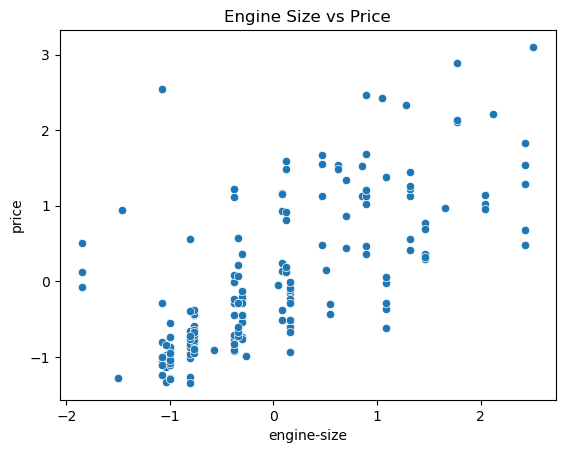

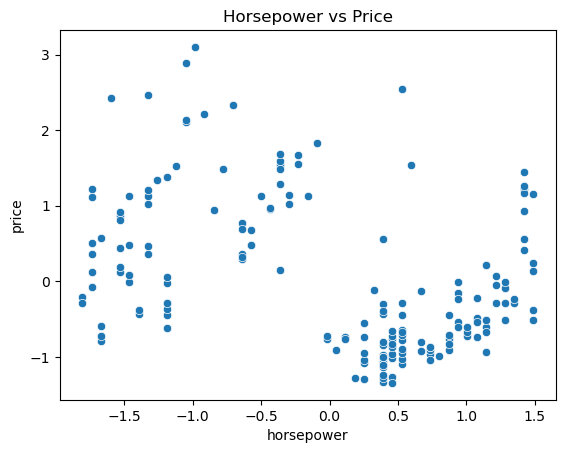

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Engine size vs Price
sns.scatterplot(x=df['engine-size'], y=df['price'])
plt.title("Engine Size vs Price")
plt.show()

# Horsepower vs Price
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title("Horsepower vs Price")
plt.show()


In [131]:
if 'drive-wheels' in df.columns:
    drive_price = df.groupby('drive-wheels')['price'].mean().sort_values(ascending=False)
    print("\n🔹 Average price by drive type:")
    print(drive_price)



🔹 Average price by drive type:
drive-wheels
 1.333740    0.941085
-2.336552   -0.187395
-0.501406   -0.468152
Name: price, dtype: float64


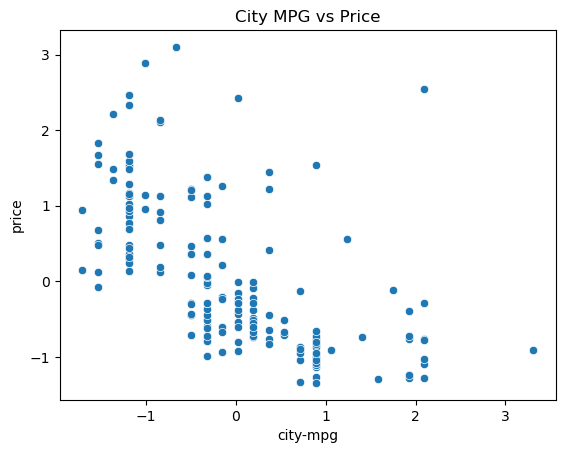

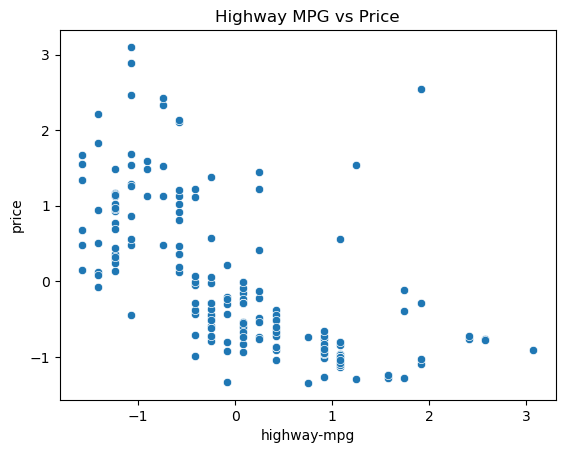

In [134]:
# City MPG vs Price
sns.scatterplot(x=df['city-mpg'], y=df['price'])
plt.title("City MPG vs Price")
plt.show()

# Highway MPG vs Price
sns.scatterplot(x=df['highway-mpg'], y=df['price'])
plt.title("Highway MPG vs Price")
plt.show()


In [135]:
# Area vs Price
if 'area' in df.columns:
    sns.scatterplot(x=df['area'], y=df['price'])
    plt.title("Engineered Area vs Price")
    plt.show()
